# Circos data 4R
This notebook calculates the weighted adjacency matrix between CDR3 sequences of **MUSL** and **PB** tissues from a given TCR chain for plotting the circos plot in R.<br>
Author: **Juan Sebastian Diaz Boada**<br>
6/12/2021<br>
Environment: *scMyositis*<br>

In [1]:
import numpy as np
import pandas as pd
from itertools import product
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Parameters

In [3]:
# Chain
chain = 'A'
chain_options = ['A','B','G','D']
if not chain in chain_options:
    raise NameError("Invalid chain. Has to be either 'A','B','G' or 'D'.")
# Cell threshold
filter_seq_number = True
thresh_seq = 2
# Paths
infile = '../data/output_data/TCR_metadata.tsv'
output_path_prefix = '../data/output_data/circos_adj_in_tissue/'
outfile = output_path_prefix + 'circos_adjacency_' + chain + \
         filter_seq_number*('_thresh_' + str(thresh_seq)) + '.csv'
outfile

'../data/output_data/circos_adj_in_tissue/circos_adjacency_A_thresh_2.csv'

# Load data

In [4]:
DF = pd.read_csv(infile,sep='\t',index_col=0)
with pd.option_context('display.max_columns',None):
    display(DF)

,plate,tissue,well,treatment.status,biopsy,patient,age,autoantibody,dx2020,sex,datebirth,datedx,AgeOnset,CK,seq_batch,TRA_1_seq,TRA_2_seq,TRB_1_seq,TRB_2_seq,TRA_productive_number,TRB_productive_number,TRA_number,TRB_number,TRA_1_productive,TRA_1_V,TRA_1_J,TRA_1_descr,TRA_2_productive,TRA_2_V,TRA_2_J,TRA_2_descr,TRB_1_productive,TRB_1_V,TRB_1_D,TRB_1_J,TRB_1_descr,TRB_2_productive,TRB_2_V,TRB_2_D,TRB_2_J,TRB_2_descr,TRG_1_seq,TRG_2_seq,TRD_1_seq,TRD_2_seq,TRG_productive_number,TRD_productive_number,TRG_number,TRD_number,TRG_1_productive,TRG_1_V,TRG_1_J,TRG_1_descr,TRG_2_productive,TRG_2_V,TRG_2_J,TRG_2_descr,TRD_1_productive,TRD_1_V,TRD_1_D,TRD_1_J,TRD_1_descr,TRD_2_productive,TRD_2_V,TRD_2_D,TRD_2_J,TRD_2_descr,RNAexpr,A_1_CDR3,A_1_CDR3_cluster,A_1_CDR3_freq,A_1_CDR3_clones,A_1_CDR3_clone_freq,A_1_CDR3_freq_MUSL,A_1_CDR3_freq_PB,A_1_V,A_1_V_cluster,A_1_V_freq,A_1_V_clones,A_1_V_clone_freq,A_1_J,A_1_J_cluster,A_1_J_freq,A_1_J_clones,A_1_J_clone_freq,A_1_descr_cluster,A_1_descr_freq,A_1_descr_clones,A_1_descr_clone_freq,A_2_CDR3,A_2_CDR3_cluster,A_2_CDR3_freq,A_2_CDR3_clones,A_2_CDR3_clone_freq,A_2_CDR3_freq_MUSL,A_2_CDR3_freq_PB,A_2_V,A_2_V_cluster,A_2_V_freq,A_2_V_clones,A_2_V_clone_freq,A_2_J,A_2_J_cluster,A_2_J_freq,A_2_J_clones,A_2_J_clone_freq,A_2_descr_cluster,A_2_descr_freq,A_2_descr_clones,A_2_descr_clone_freq,B_1_CDR3,B_1_CDR3_cluster,B_1_CDR3_freq,B_1_CDR3_clones,B_1_CDR3_clone_freq,B_1_CDR3_freq_MUSL,B_1_CDR3_freq_PB,B_1_V,B_1_V_cluster,B_1_V_freq,B_1_V_clones,B_1_V_clone_freq,B_1_J,B_1_J_cluster,B_1_J_freq,B_1_J_clones,B_1_J_clone_freq,B_1_descr_cluster,B_1_descr_freq,B_1_descr_clones,B_1_descr_clone_freq,B_2_CDR3,B_2_CDR3_cluster,B_2_CDR3_freq,B_2_CDR3_clones,B_2_CDR3_clone_freq,B_2_CDR3_freq_MUSL,B_2_CDR3_freq_PB,B_2_V,B_2_V_cluster,B_2_V_freq,B_2_V_clones,B_2_V_clone_freq,B_2_J,B_2_J_cluster,B_2_J_freq,B_2_J_clones,B_2_J_clone_freq,B_2_descr_cluster,B_2_descr_freq,B_2_descr_clones,B_2_descr_clone_freq,G_1_CDR3,G_1_CDR3_cluster,G_1_CDR3_freq,G_1_CDR3_clones,G_1_CDR3_clone_freq,G_1_CDR3_freq_MUSL,G_1_CDR3_freq_PB,G_1_V,G_1_V_cluster,G_1_V_freq,G_1_V_clones,G_1_V_clone_freq,G_1_J,G_1_J_cluster,G_1_J_freq,G_1_J_clones,G_1_J_clone_freq,G_1_descr_cluster,G_1_descr_freq,G_1_descr_clones,G_1_descr_clone_freq,G_2_CDR3,G_2_CDR3_cluster,G_2_CDR3_freq,G_2_CDR3_clones,G_2_CDR3_clone_freq,G_2_CDR3_freq_MUSL,G_2_CDR3_freq_PB,G_2_V,G_2_V_cluster,G_2_V_freq,G_2_V_clones,G_2_V_clone_freq,G_2_J,G_2_J_cluster,G_2_J_freq,G_2_J_clones,G_2_J_clone_freq,G_2_descr_cluster,G_2_descr_freq,G_2_descr_clones,G_2_descr_clone_freq,D_1_CDR3,D_1_CDR3_cluster,D_1_CDR3_freq,D_1_CDR3_clones,D_1_CDR3_clone_freq,D_1_CDR3_freq_MUSL,D_1_CDR3_freq_PB,D_1_V,D_1_V_cluster,D_1_V_freq,D_1_V_clones,D_1_V_clone_freq,D_1_J,D_1_J_cluster,D_1_J_freq,D_1_J_clones,D_1_J_clone_freq,D_1_descr_cluster,D_1_descr_freq,D_1_descr_clones,D_1_descr_clone_freq,D_2_CDR3,D_2_CDR3_cluster,D_2_CDR3_freq,D_2_CDR3_clones,D_2_CDR3_clone_freq,D_2_CDR3_freq_MUSL,D_2_CDR3_freq_PB,D_2_V,D_2_V_cluster,D_2_V_freq,D_2_V_clones,D_2_V_clone_freq,D_2_J,D_2_J_cluster,D_2_J_freq,D_2_J_clones,D_2_J_clone_freq,D_2_descr_cluster,D_2_descr_freq,D_2_descr_clones,D_2_descr_clone_freq,flag_2A2B,flag_all_1,flag_2A_1BGD,flag_2B_1AGD,flag_2G_1ABD,flag_2D_1ABG,flag_many_productives,CD4,CD8
Plate400_MUSL_A10,400,MUSL,A10,treated,14,sc6,81,negative,IMNM,M,1938-01-01,NaN,NaN,NaN,p18562,agtcaacagggagaagaggatcctcaggccttgagcatccaggagg...,NaN,gaagcccaagtgacccagaacccaagatacctcatcacagtgactg...,NaN,1,1,1,1,1,TRAV17*01,TRAJ13*01,TRAV17_GGACGAAGGTTCTG_TRAJ13,0,NaN,NaN,NaN,1,TRBV27*01,TRBD1*01,TRBJ1-2*01,TRBV27_CAGTTCCCTCGGGGCAGGGGGCTATG_TRBJ1-2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1.138727e+06,GGACGAAGGTTCTG,-1.0,1.0,unique,unique,1.0,NaN,TRAV17,2.0,139.0,clone_002,clone_002_139,TRAJ13,22.0,59.0,clone_022,clone_022_59,-1.0,1.0,unique,unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAGTTCCCTCGGGGCAGGGGGCTA

# Processing

In [5]:
df = DF.loc[DF['treatment.status']=='naive',:]
df

,plate,tissue,well,treatment.status,biopsy,patient,age,autoantibody,dx2020,sex,...,D_2_descr_clone_freq,flag_2A2B,flag_all_1,flag_2A_1BGD,flag_2B_1AGD,flag_2G_1ABD,flag_2D_1ABG,flag_many_productives,CD4,CD8
Plate404_MUSL_A10,404,MUSL,A10,naive,15,sc7,61,C1N,IBM,M,...,NaN,0,0,0,0,0,0,0,1,0
Plate404_MUSL_A11,404,MUSL,A11,naive,15,sc7,61,C1N,IBM,M,...,NaN,0,0,0,0,0,0,0,1,0
Plate404_MUSL_A12,404,MUSL,A12,naive,15,sc7,61,C1N,IBM,M,...,NaN,0,0,0,0,0,0,0,0,0
Plate404_MUSL_A13,404,MUSL,A13,naive,15,sc7,61,C1N,IBM,M,...,NaN,0,0,0,0,0,0,0,1,0
Plate404_MUSL_A14,404,MUSL,A14,naive,15,sc7,61,C1N,IBM,M,...,NaN,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Plate72_PB_P5,72,PB,P5,naive,11,sc6,81,negative,IMNM,M,...,NaN,0,0,0,0,0,0,0,1,0
Plate72_PB_P6,72,PB,P6,naive,11,sc6,81,negative,IMNM,M,...,NaN,0,0,0,0,0,0,0,1,0
Plate72_PB_P7,72,PB,P7,naive,11,sc6,81,negative,IMNM,M,...,NaN,0,0,0,0,0,0,0,1,0
Plate72_PB_P8,72,PB,P8,naive,11,sc6,81,negative,IMNM,M,...,NaN,0,0,0,0,0,0,0,1,0


### Separation of tissues
For each tissue, CDR3 sequences from both alleles of the given chain are selected and concatenated. Unique sequences are numbered and indexed in a dictionary

In [6]:
prod_col_1 = 'TR' + chain + '_1_productive'
prod_col_2 = 'TR' + chain + '_2_productive'

#### MUSL

In [26]:
# Allele 1
DF_M_1 = df.loc[np.logical_and(df[prod_col_1]==1,df['tissue']=='MUSL'),\
              [chain + '_1_CDR3','patient']].dropna()
DF_M_1

,A_1_CDR3,patient
Plate404_MUSL_A10,GTGAAGGACCCCGCCTCA,sc7
Plate404_MUSL_A13,TCTAGCGAGAACGGG,sc7
Plate404_MUSL_A14,GCTGTGGGGGGAAA,sc7
Plate404_MUSL_A15,TGTGCGATCAGAGTATACCAG,sc7
Plate404_MUSL_A17,TGACACGGGC,sc7
...,...,...
Plate72_MUSL_H22,CTGGGGAATA,sc6
Plate72_MUSL_H24,TGTGCCTACAG,sc6
Plate72_MUSL_H3,GTGCCGCCCTAACTGGT,sc6
Plate72_MUSL_H4,CTGTGCATGGGGACAT,sc6


In [27]:
# Allele 2
DF_M_2 = df.loc[np.logical_and(df[prod_col_2]==1,df['tissue']=='MUSL'),\
              [chain + '_2_CDR3','patient']].dropna()
DF_M_2

,A_2_CDR3,patient
Plate404_MUSL_A10,AACCTCTATGTTT,sc7
Plate404_MUSL_A11,AGTGAATTATGGGGAAA,sc7
Plate404_MUSL_A24,GCAAGCCCCGGTATGAATGC,sc7
Plate404_MUSL_A4,GGTGACCCCGAACA,sc7
Plate404_MUSL_B13,CAGACTGCGGGGAAATTC,sc7
...,...,...
Plate72_MUSL_H15,CTGTGCTAGATGTCAACC,sc6
Plate72_MUSL_H18,GCTTACGAGTTAAATT,sc6
Plate72_MUSL_H20,ATTGCGGGGGACTAAACGA,sc6
Plate72_MUSL_H23,TGCGCCCAGAGGAGG,sc6


In [28]:
# Concatenate both alleles
col_name = chain + '_CDR3'
DF_M_1.columns = [col_name,'patient']
DF_M_2.columns = [col_name,'patient']
DF_M = pd.concat([DF_M_1,DF_M_2],axis=0)
DF_M

,A_CDR3,patient
Plate404_MUSL_A10,GTGAAGGACCCCGCCTCA,sc7
Plate404_MUSL_A13,TCTAGCGAGAACGGG,sc7
Plate404_MUSL_A14,GCTGTGGGGGGAAA,sc7
Plate404_MUSL_A15,TGTGCGATCAGAGTATACCAG,sc7
Plate404_MUSL_A17,TGACACGGGC,sc7
...,...,...
Plate72_MUSL_H15,CTGTGCTAGATGTCAACC,sc6
Plate72_MUSL_H18,GCTTACGAGTTAAATT,sc6
Plate72_MUSL_H20,ATTGCGGGGGACTAAACGA,sc6
Plate72_MUSL_H23,TGCGCCCAGAGGAGG,sc6


In [29]:
# Create frequency column
DF_M.loc[:,'freq']=DF_M.loc[:,col_name].map(DF_M.loc[:,col_name].value_counts())
DF_M = DF_M.sort_values('freq',ascending=False).drop_duplicates(col_name)
DF_M

,A_CDR3,patient,freq
Plate404_MUSL_B4,TGTGCGATCAGAGTATACCAG,sc7,51
Plate404_MUSL_F11,GAGGGCGGTAACAC,sc7,21
Plate64_MUSL_G7,GGGTGATTCCCCACCCTCA,sc2,17
Plate64_MUSL_B12,CTGTCCCAGGAA,sc2,16
Plate72_MUSL_E8,CTGTGCATGGGGACAT,sc6,15
...,...,...,...
Plate66_MUSL_F2,CTACGAGGTATGG,sc3,1
Plate66_MUSL_F3,TGTGGAGGAATATGG,sc3,1
Plate66_MUSL_F4,GTGAGCGCGATGG,sc3,1
Plate66_MUSL_F6,AGACATGTCGGGCGCCGGT,sc3,1


In [30]:
# Threshold filter
if filter_seq_number:
    DF_M = DF_M.loc[DF_M['freq']>=thresh_seq,:]
DF_M = DF_M.sort_values('patient')
DF_M

,A_CDR3,patient,freq
Plate60_MUSL_C3,CTGTGGAATA,sc1,3
Plate60_MUSL_H15,CTTTATGGGGTACAAT,sc1,2
Plate60_MUSL_F10,CGTGATCTTCAATTA,sc1,2
Plate60_MUSL_H23,AGAGATCTAGGAGGGGATA,sc1,4
Plate60_MUSL_B3,AGTGATCAGTACACC,sc1,2
...,...,...,...
Plate404_MUSL_D17,AGACAGGGGATCTA,sc7,2
Plate404_MUSL_G8,TTATAATCTAGGAGAT,sc7,2
Plate404_MUSL_A21,AGGGTTTAAATGC,sc7,2
Plate404_MUSL_K12,GTGCTGCCCAAACC,sc7,5


In [31]:
# Indexing dictionary for MUSL (in descending order of frequency)
M2idx= {j:i for i,j in enumerate(DF_M.loc[:,col_name])}
M2idx

{'CTGTGGAATA': 0,
 'CTTTATGGGGTACAAT': 1,
 'CGTGATCTTCAATTA': 2,
 'AGAGATCTAGGAGGGGATA': 3,
 'AGTGATCAGTACACC': 4,
 'TGCAGCCGGCGGGTACAAT': 5,
 'CGTGAGGCACGATTAT': 6,
 'CTTTATGGGTTACAAT': 7,
 'CAATGCGGGGCG': 8,
 'AGTGATCTAGATG': 9,
 'GTGCTCCCCATATACT': 10,
 'CAGAGCCCACCTTTTAGGCTTTG': 11,
 'TCAGATCCAGT': 12,
 'TGCGGCTAATAAGGGGTACAA': 13,
 'AGTGAACCCGGCTT': 14,
 'CTGTGGATGGAG': 15,
 'TGGGCTTATATACAAT': 16,
 'ATCGTAACCGACAC': 17,
 'GAGACTCCCTATACAA': 18,
 'GCAAGCCATAATG': 19,
 'GAGTGGGGGGCGGGGTTC': 20,
 'GGGTGATTCCCCACCCTCA': 21,
 'TGACATAGGGACCAA': 22,
 'CTGTCCCAGGAA': 23,
 'GTGCTCCCCGCCTGGAAGGAA': 24,
 'TGTGAAACTTTAT': 25,
 'GAGAGGTCGGAATA': 26,
 'TGTGCAAGCGATGGGTTAAC': 27,
 'AAGTATAGGGTCAGG': 28,
 'CTACGCCATAC': 29,
 'GTGCTGTGAACA': 30,
 'TGAACTACGCTGTTAATG': 31,
 'TGCAGGGCCCCCCTCTAA': 32,
 'CCGTGCAGCGGTCTTCAG': 33,
 'GAGAGCCCGCGATGG': 34,
 'AATGCTAGAGGA': 35,
 'GAATATAGGGGATA': 36,
 'GCTGTCGAAGAA': 37,
 'CGTGATGGGGGG': 38,
 'TGCAGTCCCAGTAGATG': 39,
 'TGTGGACTCGTTTT': 40,
 'GAACATGATACT

#### PB

In [20]:
# Allele 1
DF_PB_1 = df.loc[np.logical_and(df[prod_col_1]==1,df['tissue']=='PB'),\
              [chain + '_1_CDR3','patient']].dropna()
DF_PB_1

,A_1_CDR3,patient
Plate406_PB_A11,GAGGGTGTGGGGGG,sc7
Plate406_PB_A12,ATGAGGGTCTATATAATT,sc7
Plate406_PB_A15,GTGCAGGACTAGACAAT,sc7
Plate406_PB_A16,AGGGGGGGTT,sc7
Plate406_PB_A18,GGAGGCGAGGGGAAC,sc7
...,...,...
Plate72_PB_P4,AAGTAGACGAGACAAA,sc6
Plate72_PB_P5,TGGGGGTCTGGGCGGGA,sc6
Plate72_PB_P6,AGTGAAACAGGTA,sc6
Plate72_PB_P7,GTGAGTTCCTTTTC,sc6


In [21]:
# Allele 2
DF_PB_2 = df.loc[np.logical_and(df[prod_col_2]==1,df['tissue']=='PB'),\
              [chain + '_2_CDR3','patient']].dropna()
DF_PB_2

,A_2_CDR3,patient
Plate406_PB_A10,GGACGCAGGGACGAACTA,sc7
Plate406_PB_A20,GCAGGTGCCCGGAGT,sc7
Plate406_PB_A8,GCAGGTACTAC,sc7
Plate406_PB_B18,TGAGACCCTACAG,sc7
Plate406_PB_B19,AGAGAAACGGGCCTGAACGGGAA,sc7
...,...,...
Plate72_PB_P13,TGTGATATCGAGGTCTGG,sc6
Plate72_PB_P16,TCATGGGTCCTGAC,sc6
Plate72_PB_P17,GCAAGCCCTAGGGGTAACT,sc6
Plate72_PB_P8,AAGTACAATATCTGG,sc6


In [22]:
# Concatenate both alleles
col_name = chain + '_CDR3'
DF_PB_1.columns = [col_name,'patient']
DF_PB_2.columns = [col_name,'patient']
DF_PB = pd.concat([DF_PB_1,DF_PB_2],axis=0)
DF_PB

,A_CDR3,patient
Plate406_PB_A11,GAGGGTGTGGGGGG,sc7
Plate406_PB_A12,ATGAGGGTCTATATAATT,sc7
Plate406_PB_A15,GTGCAGGACTAGACAAT,sc7
Plate406_PB_A16,AGGGGGGGTT,sc7
Plate406_PB_A18,GGAGGCGAGGGGAAC,sc7
...,...,...
Plate72_PB_P13,TGTGATATCGAGGTCTGG,sc6
Plate72_PB_P16,TCATGGGTCCTGAC,sc6
Plate72_PB_P17,GCAAGCCCTAGGGGTAACT,sc6
Plate72_PB_P8,AAGTACAATATCTGG,sc6


In [23]:
# Create frequency column
DF_PB.loc[:,'freq']=DF_PB.loc[:,col_name].map(DF_PB.loc[:,col_name].value_counts())
DF_PB = DF_PB.sort_values('freq',ascending=False).drop_duplicates(col_name)
DF_PB

,A_CDR3,patient,freq
Plate68_PB_K21,TGCGGGGGATA,sc4,39
Plate68_PB_K8,GCTCTCATCTTTG,sc4,35
Plate70_PB_J21,GTGAGTCCCGCATC,sc5,24
Plate406_PB_H2,GTGCACTGAAAGGAG,sc7,21
Plate406_PB_O1,GAGGGTGTGGGGGG,sc7,17
...,...,...,...
Plate66_PB_K12,TGTGCCCGAAGGGCAGG,sc3,1
Plate66_PB_K11,GAGTATAGATACT,sc3,1
Plate66_PB_K10,TTTCATGATCTTTGACAG,sc3,1
Plate66_PB_J7,AAGTATACTATGGTTTGG,sc3,1


In [24]:
# Threshold filter
if filter_seq_number:
    DF_PB = DF_PB.loc[DF_PB['freq']>=thresh_seq,:]
DF_PB = DF_PB.sort_values('patient')
DF_PB

,A_CDR3,patient,freq
Plate60_PB_L16,CAGCACTTCGTAAGGGTGG,sc1,2
Plate60_PB_P7,TGCAGAAGCCGGAGG,sc1,2
Plate60_PB_I15,AGCAACGGCTAAC,sc1,2
Plate60_PB_M8,CTTTATGGGTTACAAT,sc1,7
Plate60_PB_J4,AAGTAAAAACTCAG,sc1,3
...,...,...,...
Plate406_PB_B15,TGGTGGCGGATA,sc7,3
Plate406_PB_H20,TGTGGTCCCTCGGAATA,sc7,3
Plate406_PB_G4,GCAGAATGGAGCTTT,sc7,3
Plate406_PB_F4,TTTCAGGGGAG,sc7,2


In [25]:
# Indexing dictionary for PB (in descending order of frequency)
PB2idx= {j:i for i,j in enumerate(DF_PB.loc[:,col_name])}
PB2idx

{'CAGCACTTCGTAAGGGTGG': 0,
 'TGCAGAAGCCGGAGG': 1,
 'AGCAACGGCTAAC': 2,
 'CTTTATGGGTTACAAT': 3,
 'AAGTAAAAACTCAG': 4,
 'CTGTGGGGTGGCCTACTTCT': 5,
 'GAGGGCCGTCCCCTCTCAGG': 6,
 'GAGTGTAGGAA': 7,
 'CTACGACCCTGGAC': 8,
 'AAGCATACGGGGGGAG': 9,
 'TGAGATATACCT': 10,
 'GCAAGCCTCTCTAA': 11,
 'TACGGTCTCAGG': 12,
 'GCAAGGGGAAGGCTTTCA': 13,
 'TGAGATCCTCTAACC': 14,
 'AGTGATCGAGGAG': 15,
 'GAGCGCGGGTCGTGGT': 16,
 'CTAGAGCCTAGGGGGACCGA': 17,
 'AGAGATCCTGGAT': 18,
 'ATCCTTGGGGAGGATGCA': 19,
 'GGTGATTTCT': 20,
 'GAGAGGAATGATCGTAACC': 21,
 'GGAGAAGCGGTGGTCGACA': 22,
 'GTGAGTGTCCCCCACAATGC': 23,
 'AGGAGAAACCCACTTC': 24,
 'TGCGGGGGATA': 25,
 'AATGCTCCTGGC': 26,
 'GCCGTCCCCCTTTCT': 27,
 'GAGCGGTTCCTTTG': 28,
 'TCCTGTATAC': 29,
 'CGTCACCCAGTTTGGTT': 30,
 'GAGGGGGCTTACAA': 31,
 'GTGCTCCCCTGAATT': 32,
 'TGAGACTTACCT': 33,
 'CGTGATTACTAATA': 34,
 'ATGAATACCAA': 35,
 'AGAGAAGGCGG': 36,
 'GAGGGCCGAGGGAGGAAC': 37,
 'GAGAAGGATA': 38,
 'TGCTGCCCTCTATG': 39,
 'AGTGATCCTGGGGAAT': 40,
 'GAGTATCACCCCTGGT': 41,
 'AGCAAAT

### Find common sequences between MUSL and PB

In [73]:
common_seq = np.intersect1d(DF_M.loc[:,col_name],DF_PB.loc[:,col_name],assume_unique=True)

In [74]:
M = DF_M.loc[DF_M[col_name].isin(common_seq)].set_index(col_name)\
    .rename(columns = {'freq':'freq_M'})
PB = DF_PB.loc[DF_PB[col_name].isin(common_seq)]
PB = PB.set_index(col_name).loc[:,['freq']].rename(columns = {'freq':'freq_PB'})

In [75]:
SEQ = pd.concat([M,PB],axis=1)
SEQ

,patient,freq_M,freq_PB
A_CDR3,,,
CTTTATGGGTTACAAT,sc1,12,7
ATGAAAGTTAACA,sc4,3,3
GAGGGGGCTTACAA,sc4,2,2
GGAGAAGCGGTGGTCGACA,sc4,2,3
AGTGATCCTGGGGAAT,sc4,5,15
GCTCTCATCTTTG,sc4,10,35
TGCGGGGGATA,sc4,13,39
GCAGCTATTTCT,sc5,6,5
AAGCAGGAAGCCGGGAG,sc5,3,3


In [76]:
SEQ.loc[:,'freq_common'] = np.minimum(SEQ.loc[:,'freq_M'],SEQ.loc[:,'freq_PB'])

In [78]:
SEQ.loc[:,'R_m'] = np.maximum(0,SEQ.loc[:,'freq_M']-SEQ.loc[:,'freq_PB'])

In [80]:
SEQ.loc[:,'R_b'] = np.maximum(0,SEQ.loc[:,'freq_PB']-SEQ.loc[:,'freq_M'])

In [81]:
SEQ

,patient,freq_M,freq_PB,freq_common,R_m,R_b
A_CDR3,,,,,,
CTTTATGGGTTACAAT,sc1,12,7,7,5,0
ATGAAAGTTAACA,sc4,3,3,3,0,0
GAGGGGGCTTACAA,sc4,2,2,2,0,0
GGAGAAGCGGTGGTCGACA,sc4,2,3,2,0,1
AGTGATCCTGGGGAAT,sc4,5,15,5,0,10
GCTCTCATCTTTG,sc4,10,35,10,0,25
TGCGGGGGATA,sc4,13,39,13,0,26
GCAGCTATTTCT,sc5,6,5,5,1,0
AAGCAGGAAGCCGGGAG,sc5,3,3,3,0,0


In [102]:
m = len(DF_M)
b = len(DF_PB)
adj = np.zeros([m+1,b+1])
for i in SEQ.iterrows():
    seq = i[0]
    r = M2idx[i[0]]
    c = PB2idx[i[0]]
    adj[r,c] = i[1]['freq_common']
    adj[m,c] = adj[m,c] + i[1]['R_m']
    adj[r,b] = adj[r,b] + i[1]['R_b']

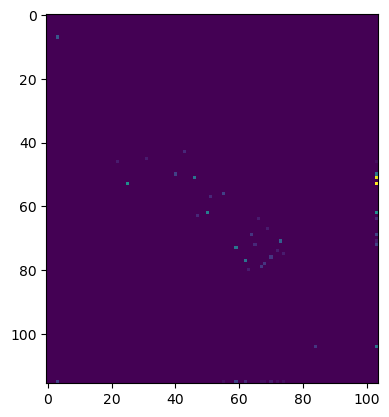

In [103]:
plt.imshow(adj)
plt.show()

In [ ]:
common_seq = np.intersect1d(DF_M.loc[:,col_name],DF_PB.loc[:,col_name],assume_unique=True)

In [ ]:
M = DF_M.loc[DF_M[col_name].isin(common_seq),:].set_index(col_name)\
    .rename(columns = {'freq':'freq_M'})
M = M.sort_index()
M

In [ ]:
PB = DF_PB.loc[DF_PB[col_name].isin(common_seq),:].set_index(col_name)\
    .rename(columns = {'freq':'freq_PB'})
PB = PB.sort_index()
PB

In [ ]:
SEQ = pd.concat([M,PB.loc[:,'freq_PB']],axis=1)
SEQ.loc[:,'freq_common'] = np.minimum(SEQ['freq_M'].values,SEQ['freq_PB'].values)
SEQ = SEQ.sort_values(['patient','freq_M'])
SEQ

In [ ]:
adj_list = pd.concat([SEQ.loc[:,'patient'],SEQ.loc[:,'patient'],\
                         SEQ.loc[:,'freq_common']],axis=1)
adj_list.columns = ['from','to','value']
adj_list

In [ ]:
adj_list.to_csv('../data/output_data/circos_adj_in_tissue/adj_list.csv',sep=',')

### Adjacency matrix

In [ ]:
adj = np.diag(SEQ['freq_common'].values)

# Export data

In [122]:
M_col = ['MUSL_' + str(i) for i in range(1,m+1)] + ['NOT_SHARED_PB']
PB_col = ['PB_' + str(i) for i in range(1,b+1)] + ['NOT_SHARED_MUSL']

In [123]:
df_adj = pd.DataFrame(adj,columns=PB_col,index=M_col,dtype=int)
df_adj

,PB_1,PB_2,PB_3,PB_4,PB_5,PB_6,PB_7,PB_8,PB_9,PB_10,...,PB_95,PB_96,PB_97,PB_98,PB_99,PB_100,PB_101,PB_102,PB_103,NOT_SHARED_MUSL
MUSL_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSL_112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUSL_115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df_adj.to_csv(outfile,sep=',')

In [121]:
outfile

'../data/output_data/circos_adj_in_tissue/circos_adjacency_A_thresh_2.csv'